[View in Colaboratory](https://colab.research.google.com/github/amrita-p/Machine_learning/blob/master/K_means_unsupervised.ipynb)

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [4]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive

In [6]:
!ls


adc.json  MyDrive  sample_data


In [6]:
%cd MyDrive

/content/MyDrive


In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

In [0]:
dataset = "colab_docs/AIML_DS_CLARA_STD.csv"

In [0]:
data = pd.read_csv(dataset)

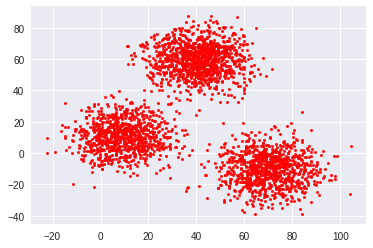

In [16]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values
# Ploting the data
#%matplotlib notebook
%matplotlib inline
# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [25]:
# Number of clusters
k = 5
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[34. 78.]
 [17. 49.]
 [29. 57.]
 [80. 51.]
 [49. 44.]]


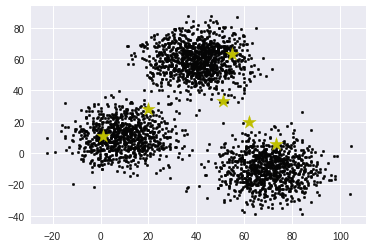

In [23]:
# Plotting along with the Centroids
#%matplotlib notebook
%matplotlib inline
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='y')
plt.show()

In [0]:
np.random.randint?

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


error: 28.713217
error: 8.758693
error: 5.382463
error: 3.6819444
error: 2.7533548
error: 1.8768604
error: 1.4567244
error: 1.1361319
error: 0.5889783
error: 0.6415676
error: 0.38322186
error: 0.27761012
error: 0.24982755
error: 0.39814627
error: 0.37494746
error: 0.22957002
error: 0.3683755
error: 0.26943296
error: 0.2818753
error: 0.4528937
error: 0.31682545
error: 0.26952103
error: 0.39710298
error: 0.44895384
error: 0.24024063
error: 0.23321855
error: 0.23107463
error: 0.17368978
error: 0.053717885


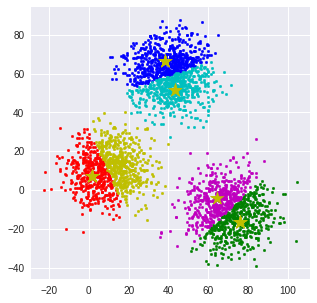

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    fig.canvas.draw()
    time.sleep(5)
    print("error:",error)
    #plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


error: 76.47163
error: 18.248358
error: 2.4190266
error: 1.7972164
error: 1.2559443
error: 0.9416073
error: 0.7236714
error: 0.6526609
error: 0.5498693
error: 0.5609923
error: 0.5131031
error: 0.3136149
error: 0.48424557
error: 0.46622485
error: 0.15504506
error: 0.11527679
error: 0.1020134
error: 0.08162219


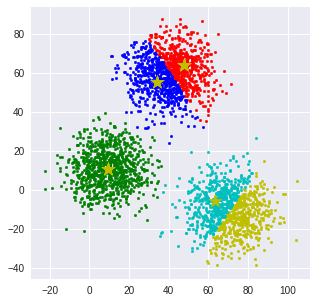

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    fig.canvas.draw()
    time.sleep(5)
    print("error:",error)
    #plt.show()